# **Module 2 - Machine Learning for Regression**

In [1]:
import pandas as pd
import numpy as np

## Data Loading
Lets get the data from Alex Grigorev mlbookcamp-code repository on github


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2024-10-04 20:52:13--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 

185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  2.57MB/s    in 0.5s    

2024-10-04 20:52:14 (2.57 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [4]:
df = pd.read_csv('./data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preparation
As the first step we standarize the column names, setting all the names in lower case and replacing spaces with underscores

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Now, we can do the same with the content of the dataframe, as we can see that the format of these values are not normalizez as well.

To do this we need to get the columns that has string values only. For this we can execute the following command that do this from the inside to the outside:
- find which columns are objects
- filter the dtypes based on the columns that are objects
- get only the index value
- convert it to a list
- assign it to a variable 'strings'


In [8]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

Now that we have all the columns we can apply the same procedure to standarize the values, meaning all content in lower case and replace spaces with underscores

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

We need to get an understanding about the type of values present in each column. For that we can do the following:

In [11]:
for col in df.columns:
    print(col) # name of the column
    print(df[col].unique()[:5]) # first five of all differente values in the column
    print(df[col].nunique()) # to get the number of unique values
    print() # just another carrier return to separate between each column values

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## Pricing Distribution
Now that we have a glimpse on the type of values on each column, we can move forward trying to understand more about the car prices.

For this we are going to use visualizations to make it easier for us to understand

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

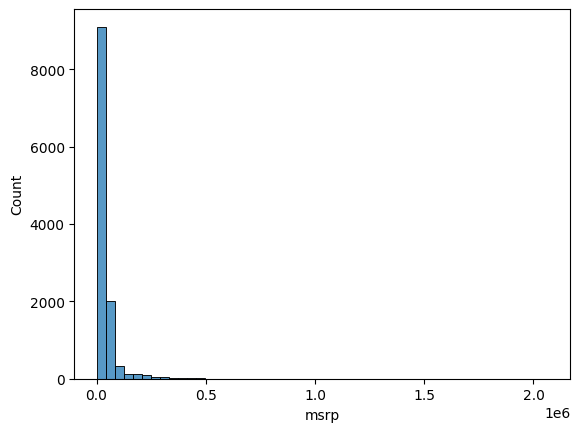

In [13]:
sns.histplot(df.msrp, bins=50)

The chart above shows what is call a long tail distribution, because we can see a lot of values at the left of the chart but there most be some cases where the msrp is really high and that alters the actual chart visualization.

For this we can filter the data to show only values that are below, for example, 100k and the result is the following one:

<Axes: xlabel='msrp', ylabel='Count'>

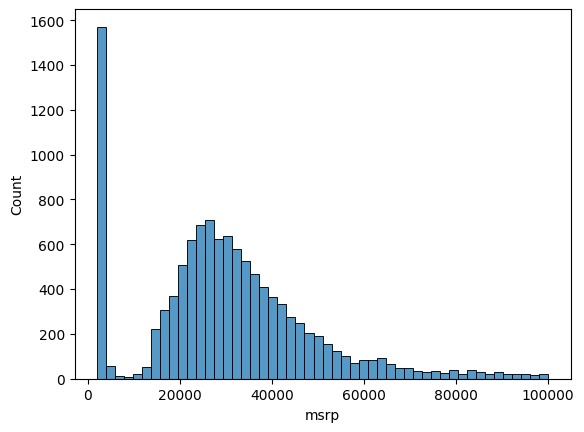

In [14]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

This type of distribution is not good for Machine Learning as the long tail will confuse the model.

For this we normally use the logarithmic values of the (in this case) the prices

In [15]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

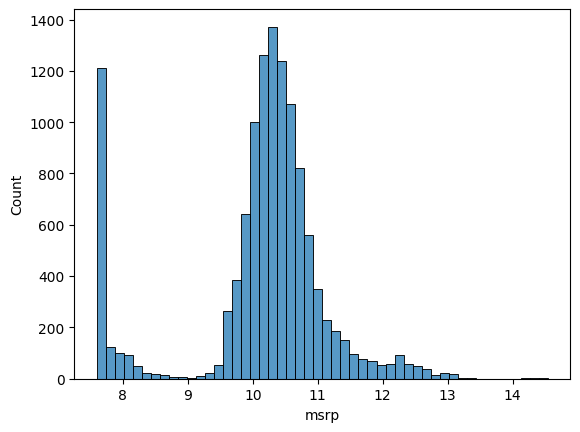

In [16]:
# Now we plot it
sns.histplot(price_logs, bins=50)

Now even considering those large numbers, we can see this look more like a **normal distribution** once we get the logarithmic values of the msrp. This is better for ML models

#### Missing Values

We need to know if there are actually missing values in the data

In [17]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

Setting the validation framework means we need to split the data into three parts:
- Training dataset (60%)
- Validation dataset (20%)
- Testing dataset (20%)

That is what we're going to do next:

In [18]:
# the length of the dataframe is
len(df)

11914

In [19]:
# so the 20% would be
len(df) * 0.2

2382.8

but we need it to be a int number (there is no fraction of a record)

In [20]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n_val, n_test, n_train, n_val + n_test + n_train, n)

2382 2382 7150 11914 11914


Now that we know how many records each dataset must have, we need to actually create the datasets

For this we cant just input the data in the same order of the original dataframe, because the data is already sorted by fields like make.

For this we shuffle the order of the records and then, create the datasets

In [21]:
# First we create an arrange with the indexes
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [22]:
# Then we shuffle it
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [23]:
# Now we define the actual datasets

df_train =  df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [24]:
len(df_train), len(df_val), len(df_test) # this results matches the lengths defined blocks above

(7150, 2382, 2382)

After this we can reset the index of each dataframe

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


After we have our dataframe we must get the target values for each dataset (our y_train, y_val and y_test)

and the datasets without this column

In [26]:
# to get the 'y'
y_train = df_train.msrp.values
y_val = df_val.msrp.values
y_test = df_test.msrp.values

In [27]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Linear Regression

Now lets do some math theory. The models is based on the followin equation:

#### **g(X) = y**   
where:

- g is the model
- X is the feature matrix
- y is the target

Another way to put it is:

#### **Xw = y**
where

- X is the feature matrix
- w are the weigths
- y is the target

if **X** is a matrix and w is a vector and we need to find out **w** in order to predict **y** then we must:

#### X . inv(X) . w = inv(X) . Y

This way X . inv(X) could be the identity matrix an then when multiplied by w would be w. The problem is that the shape of X is not squared, meaning it has the same number of columns and rows. 

To get to something like this we do the dot multiplication of X by its transverse, getting a Gram Matrix. In this way it is possible to do the dot multiplication with the inverse and complete de formula

#### inv(X.T . X) . (X.T . X) . w = inv(X.T . X) . X.T . y

as inv(X.T . X) . (X.T . X) would be the identity matrix then:

#### w = inv(X.T . X) . X.T . y

This is what the following function does

In [28]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Car price baseline problem

In [29]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [30]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [31]:
# we are going to use the following columns

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [32]:
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [33]:
y_train

array([ 14410,  19685,  19795, ...,  34675, 303300,  37820])

In [34]:
y_train_log = np.log(y_train)
y_train_log

array([ 9.57567769,  9.8876122 ,  9.89318466, ..., 10.45377425,
       12.62247769, 10.54059334])

In [35]:
train_linear_regression(X_train, y_train_log)

(nan, array([nan, nan, nan, nan, nan]))

We have a problem because there are null values on the dataset. at this point the best way to deal with this values is assigning 0 to these cases

In [36]:
X_train = df_train[base].fillna(0).values

In [37]:
# we can train again
w0, w = train_linear_regression(X_train, y_train_log)

In [38]:
y_pred = w0 + X_train.dot(w)

In [39]:
y_pred

array([ 9.54780257,  9.38719886,  9.67186305, ..., 10.30415029,
       11.97789757,  9.99855177])

<Axes: ylabel='Count'>

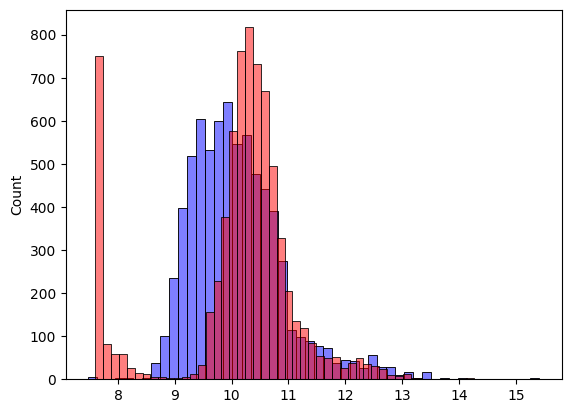

In [40]:
sns.histplot(y_pred, bins=50, color='blue', alpha=0.5)
sns.histplot(y_train_log, bins=50, color='red', alpha=0.5)


As the result we can see that normally the prediction will have a lower value than the original y values.

But we need to have a more objective way to measure how accurate the model is

## RMSE

This is the way to check with a numerical value how much is the deviation between the actual y target value and the prediction

The value is the Root Mean Squared Error

In [41]:
def rmse(y, y_pred):
    se = (y_pred - y) ** 2
    mse = np.mean(se)
    return np.sqrt(mse)

In [42]:
rmse(y_train_log, y_pred)

0.7555385345360104

## Validating the Model

In this step, we are going to use the model with the Validation dataset to see how accurate the model is with data that was not used before.

In [43]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [44]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [45]:
y_val_log = np.log(y_val)
y_val_log

array([10.19932379, 10.90870449,  9.72764496, ..., 11.21754719,
        9.77537005, 10.19241884])

In [46]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train_log)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val_log, y_pred)

0.7617699065130297

## Simple Feature Engineering

We are going to use the year of the car into the model. for this, instead of including the year of the car,
we create a new column called **age**.

In [47]:
df.year.max()

2017

In [48]:
# As the max year is 2017 (thinking this is the year the data was gathered) we can calculate the age of the car like this
2017 - df.year

0         6
1         6
2         6
3         6
4         6
         ..
11909     5
11910     5
11911     5
11912     4
11913    11
Name: year, Length: 11914, dtype: int64

So, lets write again the function that prepare the X

In [49]:
def prepare_X(df):
    df = df.copy() # this is not to alter the original dataframe
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [50]:
X_train = prepare_X(df_train)
X_train # now the result has an additional column representing the age of the car

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

Now lets train again the model and see the results

In [51]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train_log)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val_log, y_pred)

0.517271393095676

The result was better when included the new feature on the model, as the age of the car definitely represent a important aspect when considering the price a the car.

This can be seen when we deploy the histplots of the validation target vs the predictions

<Axes: ylabel='Count'>

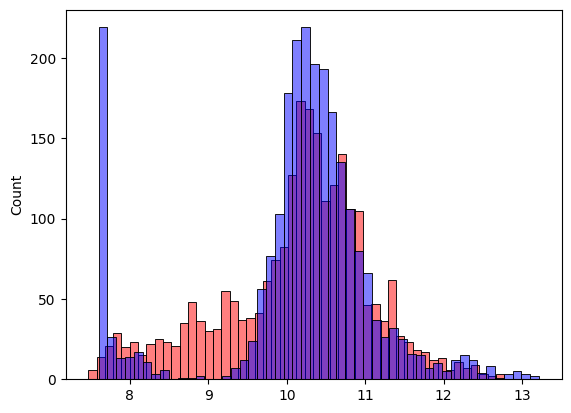

In [52]:
sns.histplot(y_pred, bins=50, color='red', alpha=0.5)
sns.histplot(y_val_log, bins=50, color='blue', alpha=0.5)


## Categorical variables

This refers to columns that has no numeric values, but string values (categories) and how we can deal with these to include them in the model

To make an exercise about categorial variables, lets try using the column of number of doors

In [53]:
df.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

Even when the value is a number, it could be considered as a category, as most probably, cars with 2 doors will be more expensive than cars with 4 doors and so on

So we create new columns encoding the number of doors with 1s and 0s

In [54]:
(df_train.number_of_doors == 2).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [55]:
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [56]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [57]:
del df_train['num_doors_2']
del df_train['num_doors_3']
del df_train['num_doors_4']

We can see 3 new columns with the encoding of the number of doors

We can update the prepare_X method now considering this

In [58]:
def prepare_X(df):    
    df = df.copy() # this is not to alter the original dataframe
    features = base.copy() # this is not to alter the original base list of features

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Finally we can train and validate again

In [59]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train_log)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val_log, y_pred)

0.5158653516081092

Previous RMSE **0.5074661974091955**

Compared with the previous RMSE value, it was a minor improvement

We can try with a another categorical column like make

In [60]:
df.make.unique()

array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
       'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota',
       'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc',
       'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford',
       'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini',
       'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura',
       'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover',
       'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla',
       'bugatti'], dtype=object)

As there are too many values, we can try with the top 5 more popular

In [61]:
df.make.value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [62]:
# we take the top 5 from that list
car_makes = list(df.make.value_counts().head().index)
car_makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

With this we can update the prepare_X method

In [63]:
def prepare_X(df):    
    df = df.copy() # this is not to alter the original dataframe
    features = base.copy() # this is not to alter the original base list of features

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c in car_makes:
        df['make_%s' % c] = (df.make == c).astype('int')
        features.append('make_%s' % c)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [64]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train_log)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val_log, y_pred)

0.5076698863676846

Previous RMSE: **0.5055257174502719**

Again we can see an improvement on the RMSE value whend implemented this new features

Lets try to improve even more the model with a bunch of additional features

In [65]:
df.dtypes.index

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [66]:
categorical_features = ['engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

To implement all these categorical values inside our prepare_X method we need to do it less "manual"

In [67]:
categories = {}

for cat in categorical_features:
    categories[cat] = list(df_train[cat].value_counts().head().index)

categories

{'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

Now we use this dictionary to update the prepare_X method

In [68]:
for c, values in categories.items():
    for v in values:
        print(c, v)

engine_fuel_type regular_unleaded
engine_fuel_type premium_unleaded_(required)
engine_fuel_type premium_unleaded_(recommended)
engine_fuel_type flex-fuel_(unleaded/e85)
engine_fuel_type diesel
transmission_type automatic
transmission_type manual
transmission_type automated_manual
transmission_type direct_drive
transmission_type unknown
driven_wheels front_wheel_drive
driven_wheels rear_wheel_drive
driven_wheels all_wheel_drive
driven_wheels four_wheel_drive
market_category crossover
market_category flex_fuel
market_category luxury
market_category hatchback
market_category luxury,performance
vehicle_size compact
vehicle_size midsize
vehicle_size large
vehicle_style sedan
vehicle_style 4dr_suv
vehicle_style coupe
vehicle_style convertible
vehicle_style 4dr_hatchback


In [81]:
def prepare_X(df):    
    df = df.copy() # this is not to alter the original dataframe
    features = base.copy() # this is not to alter the original base list of features

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [82]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train_log)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val_log, y_pred)

33.00778341904066

We actually made it worse! Lets see what happened

## Regularization

When two or more features of the X matrix are highly correlated, in other terms have values that are pretty much the same, it introduces noise to the model.

In order to solve this, we can add an small number to the diagonal. This way we make sure al the columns are different.

The way we do this is by adding a small number using the identity matrix

In [83]:
def train_linear_regression_reg(X, y, r=0.01):     # we define an updated version of the linear regression training method
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [85]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train_log, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val_log, y_pred)

0.4582311534119183

## Tunning the model

Now that we know the impact of the regularization we can test what should be the best value for the *r* parameter

In [88]:
score = pd.DataFrame(columns=['r', 'score'])

for r in [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train_log, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    #rmse(y_val_log, y_pred)
    score.loc[len(score)] = [r, rmse(y_val_log, y_pred)]

score

,r,score
0,0.00000,33.007783
1,0.00001,0.458227
2,0.00010,0.458227
3,0.00100,0.458228
4,0.01000,0.458231
5,0.10000,0.458270
6,1.00000,0.458826
7,10.00000,0.470984


<Axes: xlabel='r'>

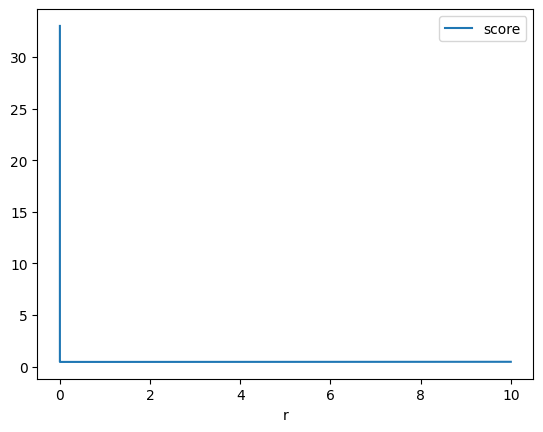

In [92]:
score.plot(x='r', y='score')

We can see that the actual model performance is good as long as the r value is > 0

## Using the model

We have build a model using training and validation dataset. Now we could combine both to better train the model and finally test it with the test dataset

In [96]:
# lets call this dataset the full train
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [97]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [105]:
# we do the same with the target
y_full_train = np.concatenate([y_train_log, y_val_log])
len(y_full_train)

9532

In [107]:
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.01)

In [108]:
y_test_log = np.log(y_test)
y_test_log

array([ 7.60090246,  8.07433769, 10.34560598, ..., 10.27849345,
       10.00784757, 10.40411131])

In [109]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test_log, y_pred)

0.45436310595841795

We got a very similar result with the test dataset, which means the model is working as expected

### Now lets simulate how we would use the model to predict the price of a car

In [113]:
# lets take one same from the test dataset

car = df_test.iloc[10].to_dict()
car

{'make': 'mazda',
 'model': '3',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 155.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'sedan',
 'highway_mpg': 41,
 'city_mpg': 29,
 'popularity': 586}

In [115]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,mazda,3,2016,regular_unleaded,155.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,41,29,586


In [116]:
# We dont need to train the model, we just execute the prediction
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred

array([10.02589973])

In [118]:
# the predicted value is in log, so we need to get the actual value
np.expm1(y_pred)[0]

22603.39715526001

If we compare this value with the actual value included on the dataset lets see how different they are

In [120]:
y_test[10]

17845

As a result we can see that the prices are not that different